In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
no_fund = np.load("./logs/DDPG_no_fund.npy")[:,:10]
no_fund.shape
fund = np.load("./logs/DDPG_fund.npy")

In [3]:
steps = np.array(range(10)) * 11000
steps

array([    0, 11000, 22000, 33000, 44000, 55000, 66000, 77000, 88000,
       99000])

In [4]:
x = steps
mean = fund.mean(axis=0)
std = fund.std(axis=0)
mean_n = no_fund.mean(axis=0)
std_n = no_fund.std(axis=0)

Text(0, 0.5, 'final value')

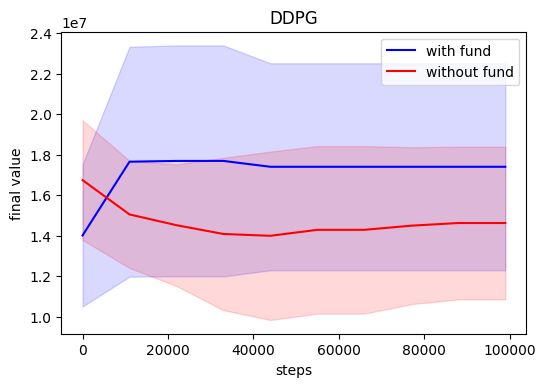

In [9]:
fig, ax = plt.subplots()
fig.set_dpi(100.0)
ax.set_title("DDPG")
ax.plot(x, mean, '-', color='blue', label='with fund')
ax.plot(x, mean_n, '-', color='red', label='without fund')
ax.legend()
ax.fill_between(x, mean-std, mean+std, alpha=0.15, color='blue')
ax.fill_between(x, mean_n-std_n, mean_n+std_n, alpha=0.15, color='red')
ax.set_xlabel("steps")
ax.set_ylabel("final value")